## importing all essential libraries


In [1]:
#Import Important libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## importing data from csv file


In [2]:
import chardet
import pandas as pd

# File path
file_path = "spam.csv"

# Detect the encoding of the file
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']

# Load the CSV file with detected encoding
df = pd.read_csv(file_path, encoding=encoding)
print(df.head())


   type                                              email
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


#### Using the chardet library to detect the encoding of a file is a reliable way to handle files with unknown or ambiguous encodings.

In [3]:
df.shape

(5572, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5572 non-null   object
 1   email   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
print(df.isnull().sum())

type     0
email    0
dtype: int64


#### No null value present in our dataset



In [6]:
df.describe()

,type,email
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


### Renaming the columns name


In [7]:
df.rename(columns= {"type":"output", "email":"sms"}, inplace=True)

In [8]:
df

,output,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## LabelEncoding:-

In [9]:
from sklearn.preprocessing import LabelEncoder  
lb=LabelEncoder()
df["output"]=lb.fit_transform(df["output"])

In [10]:
df

,output,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## Data Cleaning:-

In [11]:
df.duplicated().sum()

403

In [12]:
df.drop_duplicates(keep="first", inplace=True)

In [13]:
df.shape

(5169, 2)

In [14]:
df["output"].value_counts()

0    4516
1     653
Name: output, dtype: int64

# transforming textual data(data preprocessing):-


In [15]:
df["num_character"]=df["sms"].apply(len)

In [16]:
df

,output,sms,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pooja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df["num_of_words"]=df.apply(lambda row : len(nltk.word_tokenize(row['sms'])), axis=1)

In [19]:
df

,output,sms,num_character,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [20]:
df['num_of_sentences']=df.apply(lambda row : len(nltk.sent_tokenize(row['sms'])), axis=1)

In [21]:
df

,output,sms,num_character,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [22]:
df[['num_character','num_of_words','num_of_sentences']].describe()

,num_character,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [23]:
(df[df['output']==0][['num_character','num_of_words','num_of_sentences']]).describe()

,num_character,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [24]:
(df[df['output']==1][['num_character','num_of_words','num_of_sentences']]).describe()

,num_character,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


## Data Visualization:-

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


([<matplotlib.patches.Wedge at 0x1fe4cac0950>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.4%'),
  Text(0.5533635081542612, -0.23192418555038377, '12.6%')])

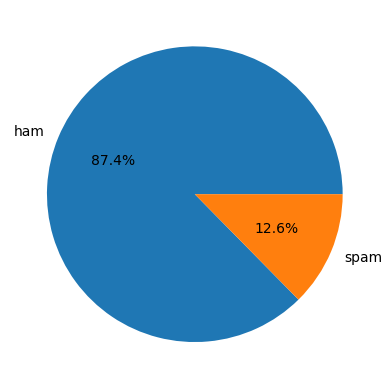

In [28]:
# PLOT THE DISTRIBUTION OF 'output]'
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%')
plt.title('Distribution of Spam and Ham')
plt.show()

[]

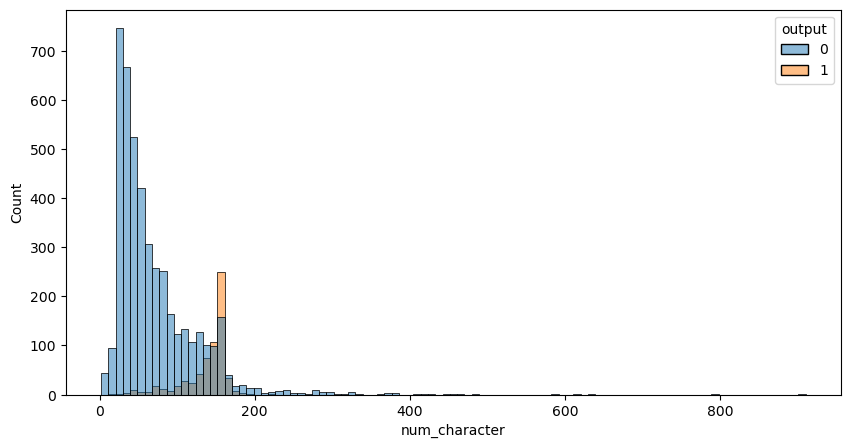

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="num_character",hue="output")
plt.plot()

In [28]:
df["num_character"].value_counts()

22     91
24     91
32     90
23     86
38     82
       ..
375     1
431     1
2       1
790     1
273     1
Name: num_character, Length: 274, dtype: int64

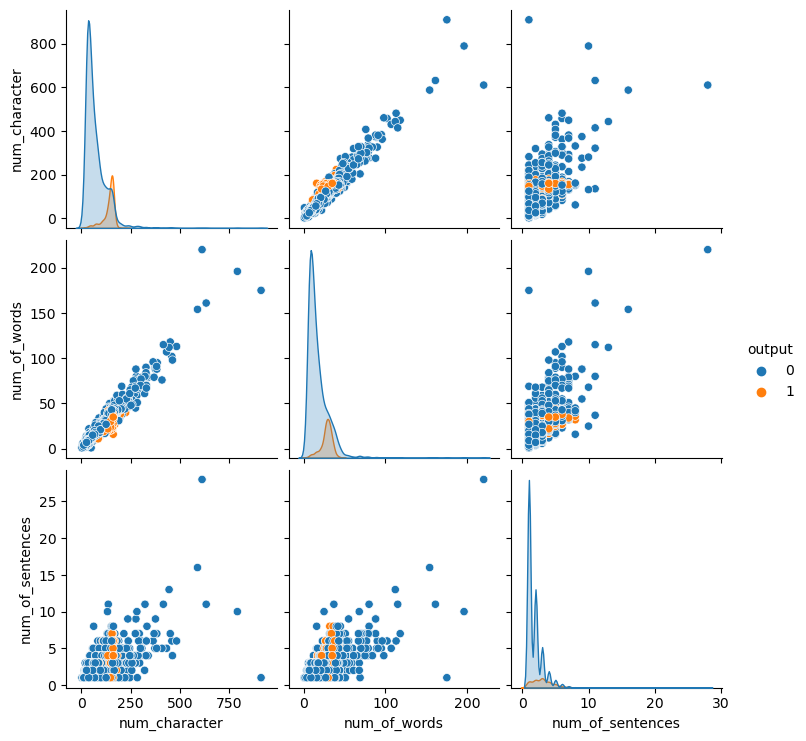

In [29]:
sns.pairplot(df, hue="output")

In [30]:
def lower_text(x):
  return x.lower()

In [31]:
df['sms']=df['sms'].apply(lower_text)


In [32]:
pattern = r'[^a-zA-Z0-9\s]'
df['sms'] = df['sms'].str.replace(pattern, '', regex=True)

In [33]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pooja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
def remove_stopwords(x):
  tex=[]
  for i in x.split(' '):
      if(i not in stopwords.words('english')):
        tex.append(i)
  return tex

In [36]:
df['transformed_txt']=df['sms'].apply(remove_stopwords)


In [37]:
from nltk.stem.porter import PorterStemmer


In [38]:
ps=PorterStemmer()


In [39]:
def stemming(x):
  tex=[]
  for i in x:
      tex.append(ps.stem(i))
  return " ".join(tex)

In [40]:
df['transformed_txt']=df['transformed_txt'].apply(stemming)


In [41]:
df.head()


,output,sms,num_character,num_of_words,num_of_sentences,transformed_txt
0,0,go until jurong point crazy available only in ...,111,24,2,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif u oni,29,8,2,ok lar joke wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say so early hor u c already then say,49,13,1,u dun say earli hor u c alreadi say
4,0,nah i dont think he goes to usf he lives aroun...,61,15,1,nah dont think goe usf live around though


## FEATURE AND LABEL SEPARATION


In [47]:
from sklearn.feature_extraction.text import CountVectorizer


In [48]:
cv=CountVectorizer()


In [49]:
x=cv.fit_transform(df['transformed_txt']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
y=df['output']
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: output, Length: 5169, dtype: int32

## SPLIT THE DATA INTO TRAINING AND TEST SETS


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, Y_train, Y_test=train_test_split(x,y)

In [55]:
X_train.shape

(3876, 7983)

In [58]:
X_test.shape

(1293, 7983)

In [56]:
Y_train.shape

(3876,)

In [59]:
Y_test.shape

(1293,)

In [57]:
df.shape

(5169, 6)

## MODEL TRAINING


In [65]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC

In [66]:
from sklearn.metrics import accuracy_score, precision_score


In [67]:
gnb=GaussianNB()
bnb=BernoulliNB()

In [68]:
gnb.fit(X_train,Y_train)
gnb_pred=gnb.predict(X_test)

In [71]:
print("Train score:", gnb.score(X_train, Y_train))
print("Test Score:", accuracy_score(Y_test,gnb_pred))

Train score: 0.9440144478844169
Test Score: 0.8839907192575406


In [72]:
bnb.fit(X_train,Y_train)
bnb_pred=bnb.predict(X_test)

In [73]:
print("Train score:", bnb.score(X_train, Y_train))
print("Test Score:", accuracy_score(Y_test, bnb_pred))

Train score: 0.9791021671826625
Test Score: 0.9559164733178654


### Conclusion:-
The Gaussian Naive Bayes model achieved a training accuracy of 94.40% and a test accuracy of 88.40%, indicating moderate generalization from training to testing. In contrast, the Bernoulli Naive Bayes model performed exceptionally well with a training accuracy of 97.91% and a test accuracy of 95.59%, suggesting a better fit and generalization for the given dataset. Both models generalize well, but the Bernoulli Naive Bayes model demonstrates superior performance and is the better choice for this dataset.   